=== Loading Data ===

=== Performing EDA ===

=== Basic Dataset Information ===

Dataset Shape: (1340, 13)

=== Missing Values ===
CASENUM                   0
ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64


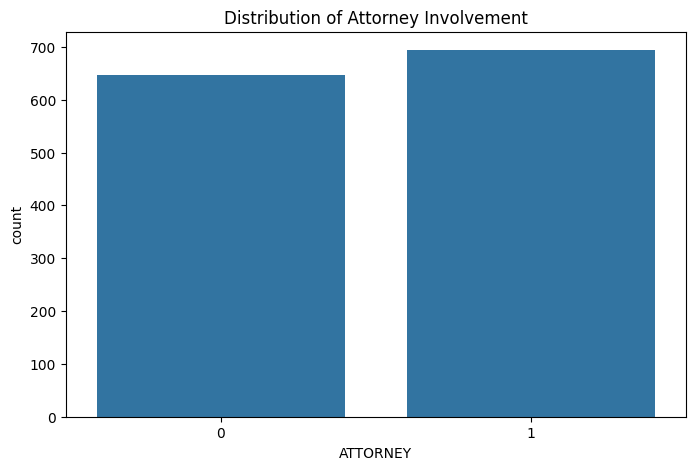

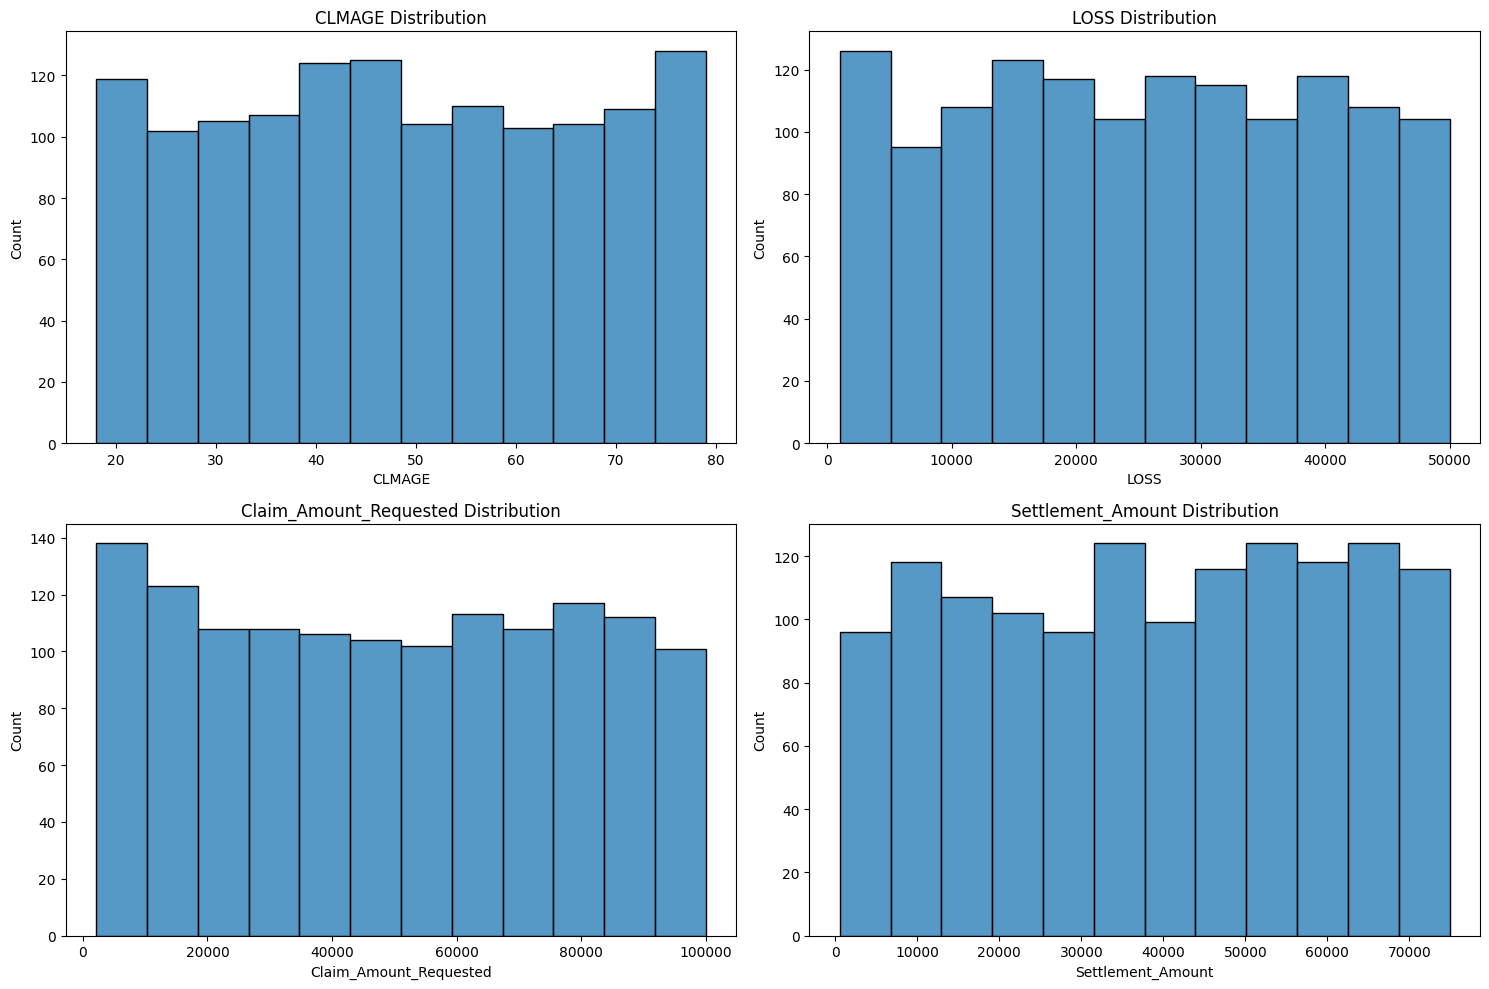

<ipython-input-6-c9ff3e7e75da>:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-6-c9ff3e7e75da>:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-6-c9ff3e7e75da>:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


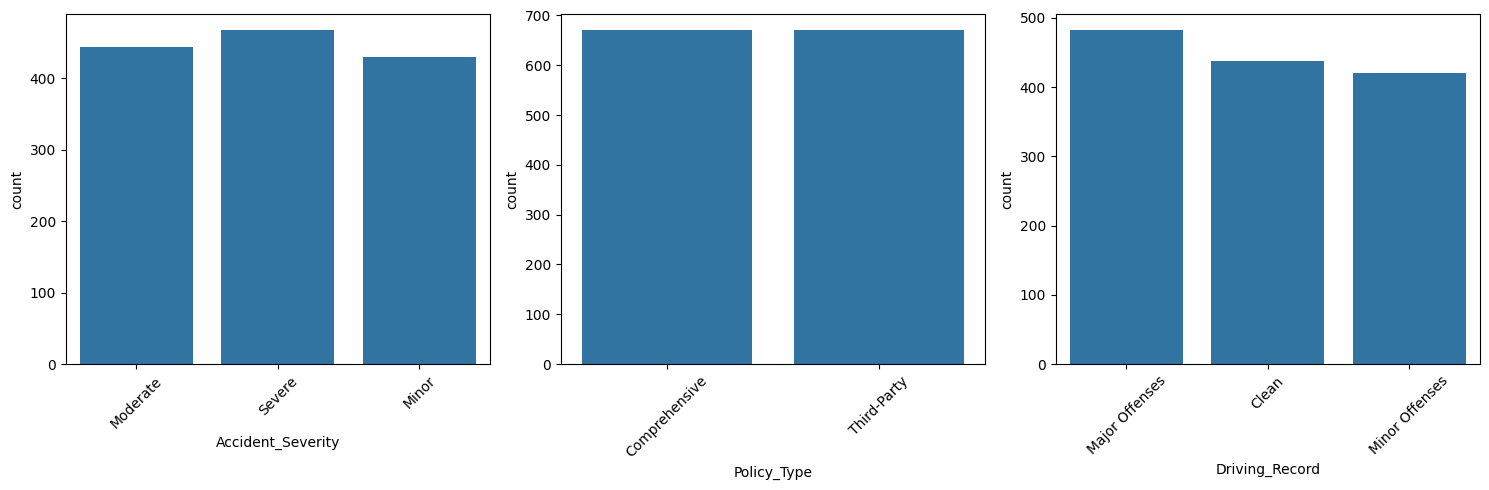

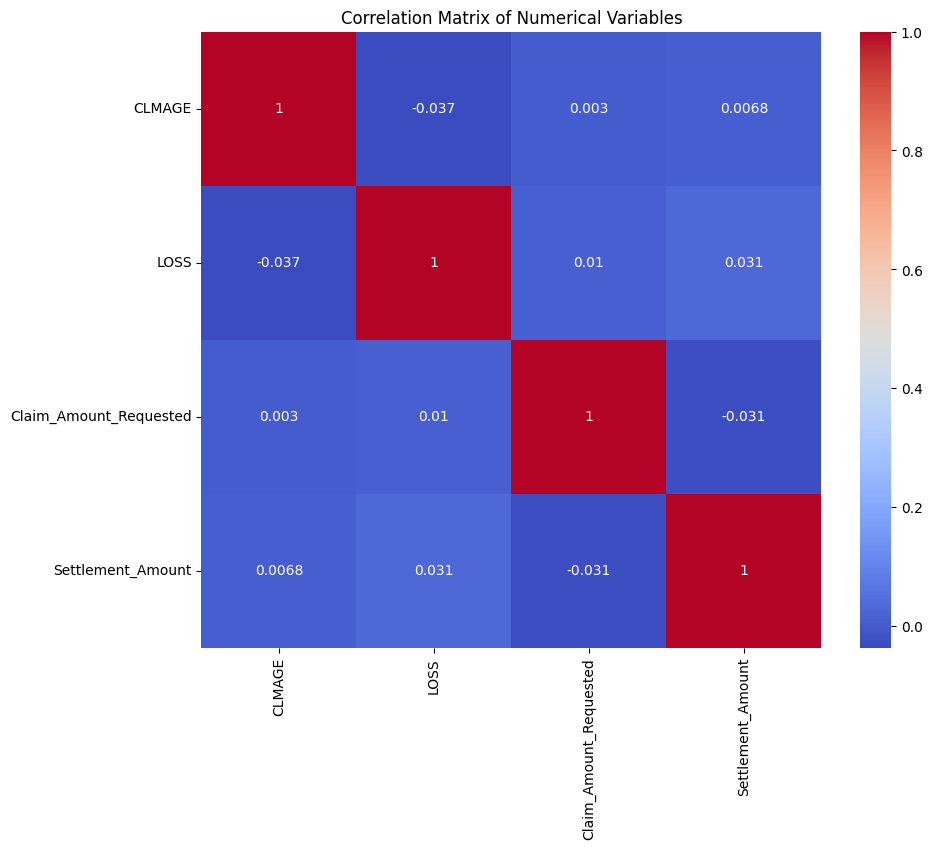


=== Creating Features ===

=== Created Features ===
New features created: ['Loss_Claim_Ratio', 'Settlement_Claim_Ratio', 'Age_Group', 'Risk_Score', 'High_Value_Claim', 'Severity_Loss']

=== Encoding Categorical Variables ===

=== Encoded Categorical Variables ===
Encoded features: ['Accident_Severity', 'Policy_Type', 'Driving_Record', 'Age_Group']

=== Scaling Numerical Features ===

=== Scaled Numerical Features ===
Scaled features: ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount', 'Loss_Claim_Ratio', 'Settlement_Claim_Ratio', 'Risk_Score', 'Severity_Loss']

=== Preparing Modeling Data ===

=== Modeling Data Prepared ===
Training set shape: (1072, 17)
Testing set shape: (268, 17)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

class AttorneyClaimAnalysis:
    def __init__(self):
        self.df = None
        self.label_encoders = {}
        self.scaler = StandardScaler()

    def load_sample_data(self):
        """
        Create sample data based on the provided schema
        """
        data = {
            'CASENUM': range(1, 1341),
            'ATTORNEY': np.random.randint(0, 2, 1340),
            'CLMSEX': np.random.randint(0, 2, 1340),
            'CLMINSUR': np.random.randint(0, 2, 1340),
            'SEATBELT': np.random.randint(0, 2, 1340),
            'CLMAGE': np.random.randint(18, 80, 1340),
            'LOSS': np.random.uniform(1000, 50000, 1340),
            'Accident_Severity': np.random.choice(['Minor', 'Moderate', 'Severe'], 1340),
            'Claim_Amount_Requested': np.random.uniform(2000, 100000, 1340),
            'Claim_Approval_Status': np.random.randint(0, 2, 1340),
            'Settlement_Amount': np.random.uniform(500, 75000, 1340),
            'Policy_Type': np.random.choice(['Comprehensive', 'Third-Party'], 1340),
            'Driving_Record': np.random.choice(['Clean', 'Minor Offenses', 'Major Offenses'], 1340)
        }
        self.df = pd.DataFrame(data)
        return self.df

    def perform_eda(self):
        """
        Perform Exploratory Data Analysis
        """
        print("\n=== Basic Dataset Information ===")
        print("\nDataset Shape:", self.df.shape)
        print("\n=== Missing Values ===")
        print(self.df.isnull().sum())

        # Target Variable Distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(data=self.df, x='ATTORNEY')
        plt.title('Distribution of Attorney Involvement')
        plt.show()

        # Numerical Variables Analysis
        numerical_cols = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

        # Distribution plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        for i, col in enumerate(numerical_cols):
            sns.histplot(data=self.df, x=col, ax=axes[i//2, i%2])
            axes[i//2, i%2].set_title(f'{col} Distribution')
        plt.tight_layout()
        plt.show()

        # Categorical Variables Analysis
        categorical_cols = ['Accident_Severity', 'Policy_Type', 'Driving_Record']
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i, col in enumerate(categorical_cols):
            sns.countplot(data=self.df, x=col, ax=axes[i])
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        plt.tight_layout()
        plt.show()

        # Correlation Analysis
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df[numerical_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix of Numerical Variables')
        plt.show()

    def create_features(self):
        """
        Create new features from existing data
        """
        # 1. Financial Ratios
        self.df['Loss_Claim_Ratio'] = self.df['LOSS'] / self.df['Claim_Amount_Requested']
        self.df['Settlement_Claim_Ratio'] = self.df['Settlement_Amount'] / self.df['Claim_Amount_Requested']

        # 2. Age Groups
        self.df['Age_Group'] = pd.cut(self.df['CLMAGE'],
                                    bins=[0, 25, 35, 45, 55, 100],
                                    labels=['18-25', '26-35', '36-45', '46-55', '55+'])

        # 3. Risk Score
        severity_map = {'Minor': 0.1, 'Moderate': 0.2, 'Severe': 0.3}
        driving_record_map = {'Clean': 0.1, 'Minor Offenses': 0.2, 'Major Offenses': 0.3}

        self.df['Risk_Score'] = (
            (self.df['LOSS'] / self.df['LOSS'].max() * 0.3) +
            (self.df['Claim_Amount_Requested'] / self.df['Claim_Amount_Requested'].max() * 0.3) +
            (self.df['Accident_Severity'].map(severity_map)) +
            (self.df['Driving_Record'].map(driving_record_map))
        )

        # 4. High Value Indicators
        self.df['High_Value_Claim'] = (self.df['Claim_Amount_Requested'] >
                                      self.df['Claim_Amount_Requested'].median()).astype(int)

        # 5. Interaction Features
        self.df['Severity_Loss'] = (self.df['Accident_Severity'].map(severity_map) *
                                   self.df['LOSS'])

        print("\n=== Created Features ===")
        new_features = ['Loss_Claim_Ratio', 'Settlement_Claim_Ratio', 'Age_Group',
                       'Risk_Score', 'High_Value_Claim', 'Severity_Loss']
        print("New features created:", new_features)

        return self.df

    def encode_categorical(self):
        """
        Encode categorical variables
        """
        categorical_cols = ['Accident_Severity', 'Policy_Type', 'Driving_Record', 'Age_Group']

        for col in categorical_cols:
            self.label_encoders[col] = LabelEncoder()
            self.df[col] = self.label_encoders[col].fit_transform(self.df[col])

        print("\n=== Encoded Categorical Variables ===")
        print("Encoded features:", categorical_cols)

        return self.df

    def scale_numerical(self):
        """
        Scale numerical features
        """
        numerical_cols = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount',
                         'Loss_Claim_Ratio', 'Settlement_Claim_Ratio', 'Risk_Score',
                         'Severity_Loss']

        self.df[numerical_cols] = self.scaler.fit_transform(self.df[numerical_cols])

        print("\n=== Scaled Numerical Features ===")
        print("Scaled features:", numerical_cols)

        return self.df

    def prepare_modeling_data(self):
        """
        Prepare final dataset for modeling
        """
        # Drop unnecessary columns
        features_to_drop = ['CASENUM', 'ATTORNEY']
        X = self.df.drop(columns=features_to_drop)
        y = self.df['ATTORNEY']

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        print("\n=== Modeling Data Prepared ===")
        print("Training set shape:", X_train.shape)
        print("Testing set shape:", X_test.shape)

        return X_train, X_test, y_train, y_test

    def run_complete_analysis(self):
        """
        Run the complete analysis pipeline
        """
        # 1. Load Data
        print("=== Loading Data ===")
        self.load_sample_data()

        # 2. Perform EDA
        print("\n=== Performing EDA ===")
        self.perform_eda()

        # 3. Create Features
        print("\n=== Creating Features ===")
        self.create_features()

        # 4. Encode Categorical Variables
        print("\n=== Encoding Categorical Variables ===")
        self.encode_categorical()

        # 5. Scale Numerical Features
        print("\n=== Scaling Numerical Features ===")
        self.scale_numerical()

        # 6. Prepare Modeling Data
        print("\n=== Preparing Modeling Data ===")
        X_train, X_test, y_train, y_test = self.prepare_modeling_data()

        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'feature_names': X_train.columns.tolist(),
            'label_encoders': self.label_encoders,
            'scaler': self.scaler
        }

# Run the analysis
if __name__ == "__main__":
    analysis = AttorneyClaimAnalysis()
    results = analysis.run_complete_analysis()


--- Random Forest ---
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       116
           1       0.53      0.50      0.51       104

    accuracy                           0.55       220
   macro avg       0.55      0.55      0.55       220
weighted avg       0.55      0.55      0.55       220

Confusion Matrix:
[[69 47]
 [52 52]]


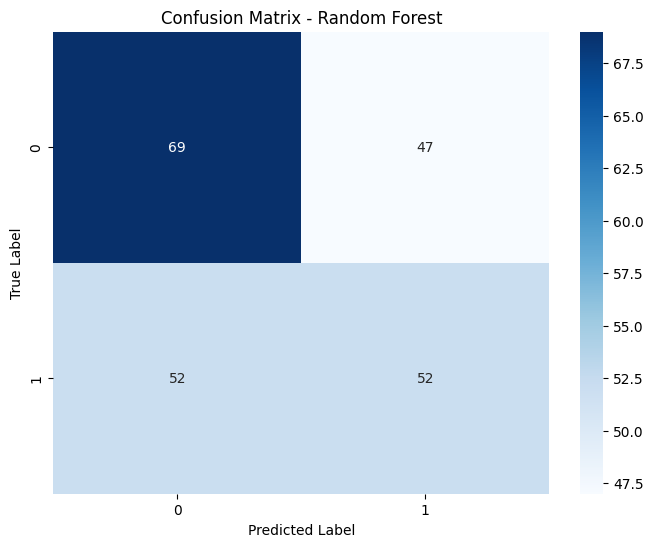

--- Logistic Regression ---
Accuracy: 0.5409090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.59       116
           1       0.52      0.43      0.47       104

    accuracy                           0.54       220
   macro avg       0.54      0.54      0.53       220
weighted avg       0.54      0.54      0.54       220

Confusion Matrix:
[[74 42]
 [59 45]]


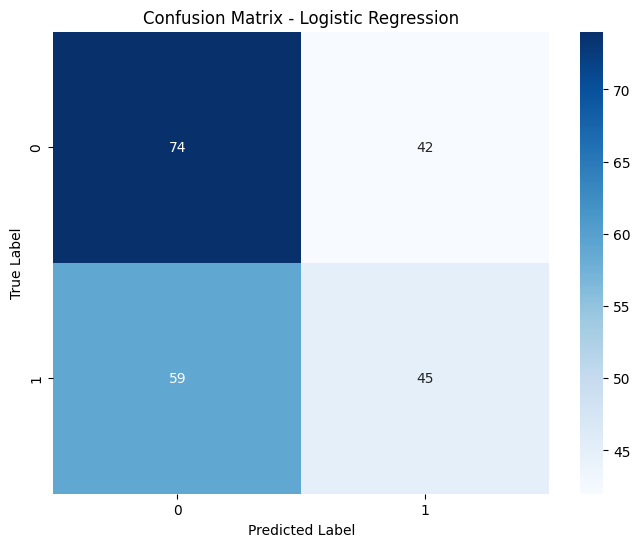

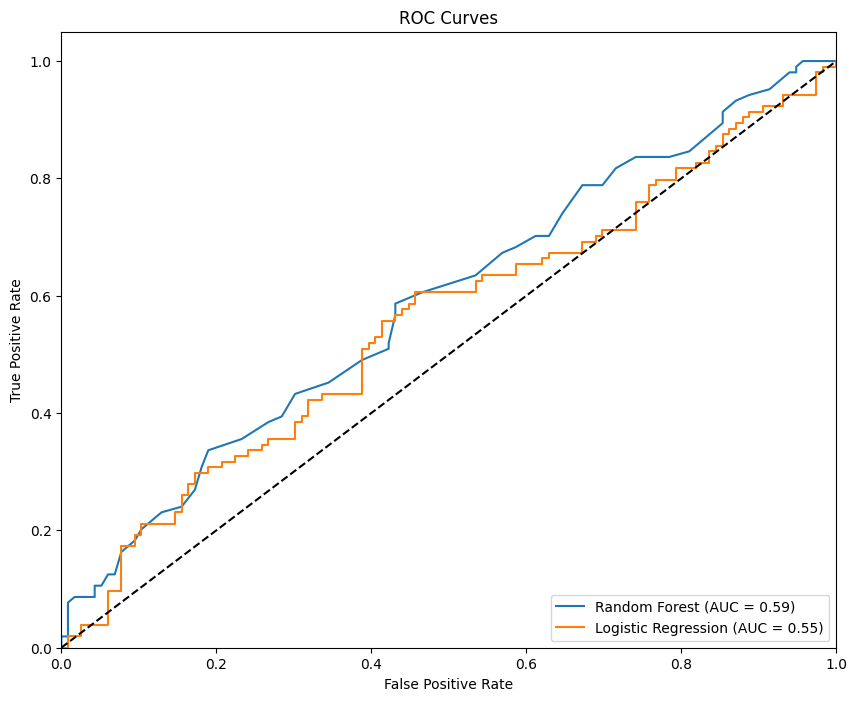

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                              roc_curve, auc, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_data(filename):
    df = pd.read_csv(filename)
    df_clean = df.dropna()
    X = df_clean.drop(columns=['ATTORNEY', 'CASENUM'])
    y = df_clean['ATTORNEY']
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def create_pipeline(model):
    categorical_features = ['CLMSEX', 'Policy_Type', 'Driving_Record', 'Accident_Severity']
    numerical_features = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

def plot_confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_roc_curve(y_test, y_probs, model_names):
    plt.figure(figsize=(10, 8))
    for i, (y_prob, name) in enumerate(zip(y_probs, model_names)):
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    return y_prob

if __name__ == "__main__":
    # Load and split data
    X_train, X_test, y_train, y_test = load_and_preprocess_data("Updated_Claimants_Dataset.csv")

    # Train and evaluate Random Forest
    rf_pipeline = create_pipeline(RandomForestClassifier(random_state=42))
    rf_probs = evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test, "Random Forest")

    # Train and evaluate Logistic Regression
    lr_pipeline = create_pipeline(LogisticRegression(random_state=42))
    lr_probs = evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test, "Logistic Regression")

    # Plot ROC curves
    plot_roc_curve(y_test, [rf_probs, lr_probs], ["Random Forest", "Logistic Regression"])